#1. DATA COLLECTION

In [ ]:
import seaborn as sns
import pandas as pd
df= sns.load_dataset("tips")
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


##2. Understanding the dataset
#total_bill-->x i/p
#tip--> Y o/p

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#3. stats summary

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#4. realtionship check
Before using any model, we must confirm relationship..?


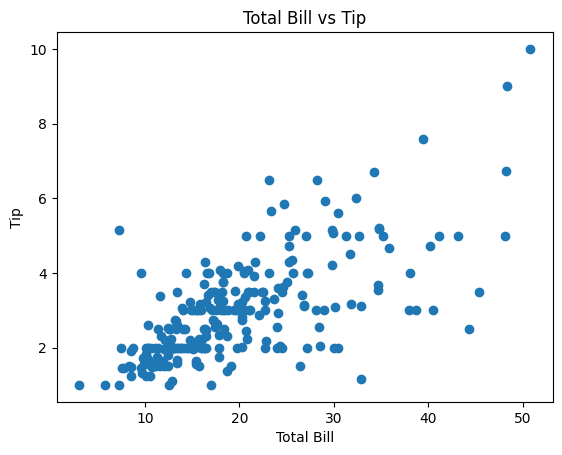

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()


#Observations :
1. As the bill increases , tip increases
2. Relationship=straight line (we can use linear regression)


#5. Feature & Target Separation
note: i/p must be in 2D format

In [ ]:
x=df[["total_bill"]] #feature i/p mujst be 2D
y=df["tip"] #can be 1D


#6. Train-Test Split
why..? model must perform well on unseen data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#test_size=0.2 means 20% data is for **testing** and remaining 80% is for **training**
#random_state=42 means it'll select randomly some 42 datapoints from the 80% data containig of aroung 100 points

#7.Feature Standardization
why...?
standardization - to be on same scale
1. compare coefficients fairly
2. Avoid dominace of karge values
3. Prepare for Ridge/Lasso

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


#imp:
1. Fit only on training data
2. prevents data leakage

#8. Train Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_trained_scaled,y_train)
print("co-efficient or slope(m) : ",model.coef_[0])
print("intercept(c) : ",model.intercept_)

co-efficient or slope(m) :  0.9357171400271824
intercept(c) :  3.0877948717948724


In [ ]:
y_pred=model.predict(x_test_scaled)
print(y_pred)

[3.04525623 1.86330727 3.55119456 3.69452593 2.31576375 2.83881627
 3.96728338 2.26014262 2.50615915 2.57033737 2.88160176 2.07723468
 2.06439904 2.47407003 2.00236009 2.91903905 2.92652651 3.23351235
 2.68478854 5.33107064 3.13831465 3.13403611 2.4558862  1.94673896
 3.16077703 2.17564129 2.02375283 3.62927807 2.68906708 6.07767732
 4.99734388 1.75313465 2.83025918 3.09552917 2.74040966 3.50092162
 2.21200895 5.53644096 2.33287794 3.35010279 2.04942412 2.47834858
 3.48701634 2.03017065 2.03124029 1.25361414 2.05798121 2.92438724
 1.73388118]


#9. Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred) #R-Square test
print("R-Square score : ",r2)

R-Square score :  0.5449381659234664


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)
print("Mean Squared Error : ",mse)

Root Mean Squared Error :  0.7541977545199626
Mean Squared Error :  0.5688142529229537


#10. Visualize the Best fit Line

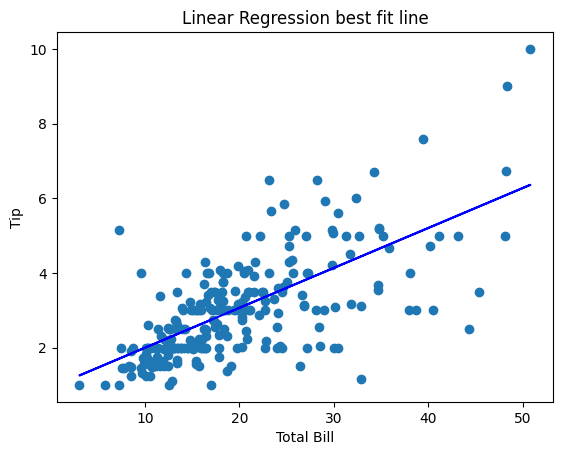

In [ ]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color='blue')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression best fit line")
plt.show()

#11. Input- Output Real Time


In [ ]:
bill_amount=float(input("Enter the bill amount: "))
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f"Predicted Tip Amount : ${predict_tip[0] : .2f}")


Enter the bill amount: 2000
Predicted Tip Amount :  214.85264926393023


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
